In [2]:
import tensorflow as tf
from tensorflow import keras
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from keras.layers import Dense, Flatten
from keras import Input
from tensorflow.keras.utils import plot_model

from tensorflow.keras.datasets import mnist, fashion_mnist

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42,shuffle = True)


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape[0]

60000

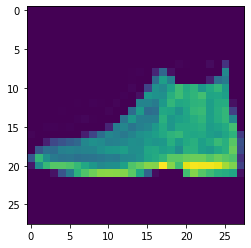

In [5]:
plt.imshow(x_test[0])


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 128)               100480    
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


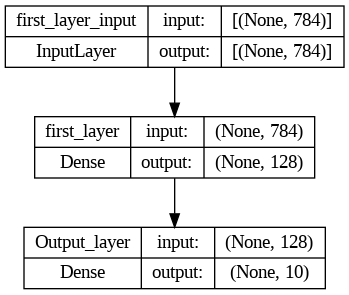

In [ ]:
# Method 1 : Specifying the input shape we want, implicitly assuming that we will be converting the input data to this form. Here we are specifying that the input will be of the form (None,28*28). That is we are defining the dimensions as (None,784) and the data has to be preprocessed this way
# - ie a single data point has to be converted from (28,28) to the form (1,784)

seq_model = keras.Sequential()
inp_shape = np.prod(x_train[0].shape)
seq_model.add(Dense(128, activation="relu",name="first_layer"))
n_classes = len(set(y_train))
seq_model.add(Dense(n_classes, activation="softmax",name="Output_layer"))

seq_model.build(input_shape=(None, inp_shape))  #None means it can take any batch size; 3 is the number of features in your input

print(seq_model.summary())
plot_model(seq_model,show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (Flatten)             (None, 784)               0         
                                                                 
 first_layer (Dense)         (None, 128)               100480    
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


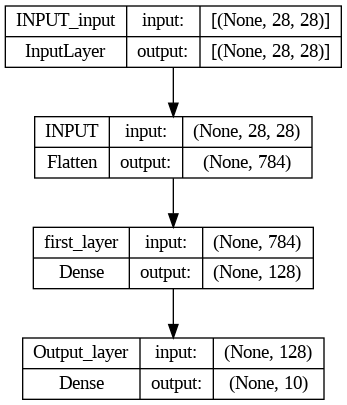

In [7]:
#Method 2 : Using the function  flatten on the input data to create the input layer at the start. Here the data is processed in its original form of (28,28). We apply flatten to convert it to (None,784)
#Note - Its not neccessary to convert the data to (None,784) form - we can still build a nn with the input is of the form (28,28) - However this would result in the weights being applying to each column of the tensor 
#(ie data point 28,28) than each pixel or element of the tensor. See https://stackoverflow.com/questions/52184142/keras-sequential-dense-input-layer-and-mnist-why-do-images-need-to-be-reshape

seq_model = keras.Sequential()
inp_shape =(x_train[0].shape)
seq_model.add(Flatten(input_shape=inp_shape,name="INPUT"))


seq_model.add(Dense(128, activation="relu",name="first_layer"))
n_classes = len(set(y_train))
seq_model.add(Dense(n_classes, activation="softmax",name="Output_layer"))


print(seq_model.summary())
plot_model(seq_model,show_shapes=True)

In [8]:
seq_model.compile(optimizer ='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])

In [9]:
#Fitting without Callbacks

history = seq_model.fit(x=x_train_sub, y=y_train_sub, epochs=10,
                    validation_data=(x_val, y_val))

#history = seq_model.fit(x=x_train, y=y_train, epochs=20,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.5069 - accuracy: 0.8234 - val_loss: 0.4114 - val_accuracy: 0.8550
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3819 - accuracy: 0.8643 - val_loss: 0.3768 - val_accuracy: 0.8677
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3448 - accuracy: 0.8741 - val_loss: 0.3747 - val_accuracy: 0.8632
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3175 - accuracy: 0.8839 - val_loss: 0.3270 - val_accuracy: 0.8832
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2962 - accuracy: 0.8918 - val_loss: 0.3263 - val_accuracy: 0.8825
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2845 - accuracy: 0.8933 - val_loss: 0.3248 - val_accuracy: 0.8783
Epoch 7/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2701 - accuracy: 0.9002 - val_loss: 0.3247 - val_accurac

In [13]:
data = pd.DataFrame(history.history)
data.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.506876,0.823389,0.411428,0.855000
1,0.381887,0.864259,0.376775,0.867667
2,0.344775,0.874130,0.374732,0.863167
3,0.317502,0.883907,0.326957,0.883167
4,0.296227,0.891778,0.326295,0.882500
5,0.284478,0.893278,0.324758,0.878333
6,0.270121,0.900185,0.324714,0.886833
7,0.257635,0.904444,0.327493,0.880167
8,0.249870,0.906722,0.313379,0.886167
9,0.241602,0.909370,0.314102,0.886000


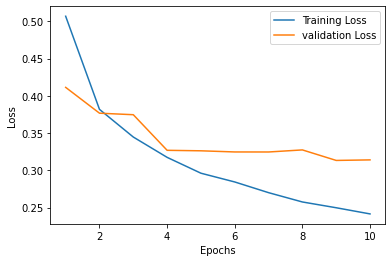

In [12]:
plt.plot(range(1,11),data['loss'], label="Training Loss")
plt.plot(range(1,11),data['val_loss'],label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
#Fitting with Call backs

callbacks_list = [EarlyStopping(monitor="val_loss", patience=2),
                  ModelCheckpoint("mnist_model_checkpoint",save_best_only=True),
                  TensorBoard(log_dir="/tensorboard_files")]

seq_model.fit(x=x_train_sub, y=y_train_sub, epochs=10,
                    validation_data=(x_val, y_val),callbacks=callbacks_list)

Epoch 1/10
1681/1688 [============================>.] - ETA: 0s - loss: 0.2328 - accuracy: 0.9129

1688/1688 [==============================] - 10s 6ms/step - loss: 0.2329 - accuracy: 0.9128 - val_loss: 0.3237 - val_accuracy: 0.8830
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2263 - accuracy: 0.9150 - val_loss: 0.3241 - val_accuracy: 0.8842
Epoch 3/10
1684/1688 [============================>.] - ETA: 0s - loss: 0.2190 - accuracy: 0.9173

1688/1688 [==============================] - 10s 6ms/step - loss: 0.2191 - accuracy: 0.9173 - val_loss: 0.3176 - val_accuracy: 0.8847
Epoch 4/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2129 - accuracy: 0.9186 - val_loss: 0.3330 - val_accuracy: 0.8885
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2057 - accuracy: 0.9225 - val_loss: 0.3275 - val_accuracy: 0.8880


In [17]:
#test_loss, test_accuracy = seq_model.evaluate(x_test, y_test)
#print("Test accuracy:", test_accuracy)


best_model = tf.keras.models.load_model("mnist_model_checkpoint")
best_model.summary()
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(test_accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (Flatten)             (None, 784)               0         
                                                                 
 first_layer (Dense)         (None, 128)               100480    
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.8832
0.8831999897956848


In [18]:
#Predicting the labels for first five test points and comparing the actual labels

y_prob = best_model.predict(x_test[:5]) 
y_classes = y_prob.argmax(axis=-1)
print(y_classes)
print(y_test[:5])

1/1 [==============================] - 0s 98ms/step
[9 2 1 1 6]
[9 2 1 1 6]


Functional API - Neural Network Creation  Just for experimentation

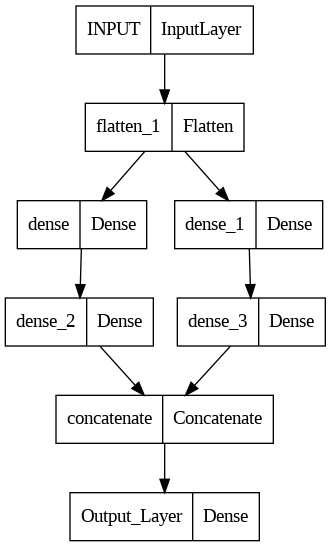

In [26]:


# Inputs
inp_shape =(x_train[0].shape)

inp_layer = keras.Input(shape=(inp_shape), name="INPUT")
inp_layer_flattened = keras.layers.Flatten()(inp_layer)

dense_1 = keras.layers.Dense(64, activation = "relu")(inp_layer_flattened)
dense_2 = keras.layers.Dense(32, activation = "softmax")(inp_layer_flattened)

dense_1_2 = keras.layers.Dense(24, activation = "relu")(dense_1)
dense_2_2 = keras.layers.Dense(16, activation = "relu")(dense_2)

conc_layer = keras.layers.Concatenate()([dense_1_2, dense_2_2])

output_layer = keras.layers.Dense(9, activation = "softmax",name = "Output_Layer")(conc_layer)

func_model = keras.Model(inputs=inp_layer,
                    outputs=output_layer)

plot_model(func_model)

Experimenting

In [ ]:
from tensorflow.keras import layers
model =  keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28),name="INPUT"))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (Flatten)             (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


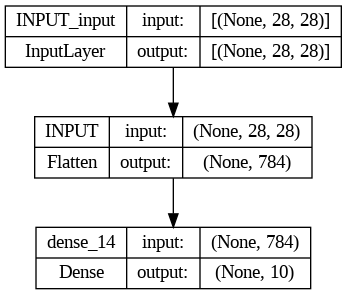

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
history = model.fit(x, y, epochs=100, batch_size=32, verbose=0, validation_split=0.2, callbacks=[early_stopping])

# get the best model
best_epoch = np.argmin(history.history['val_loss']) + 1
model.fit(x, y, epochs=best_epoch, batch_size=32, verbose=0)